magic number: 2049
item num: 60000
magic number: 2051
item num: 60000, 28 row * 28 col
5.0


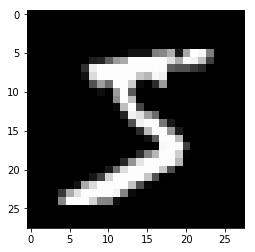

In [11]:

import struct
import numpy as np
import matplotlib.pyplot as plt

def parse_idx3(path):
    # read bin data from file
    bin_data = open(path, 'rb').read()

    # parse head info
    offset = 0
    # read first 4 line
    format_head = '>iiii'
    magic_number, item_num, row_num, col_num = struct.unpack_from(format_head, bin_data, offset)
    print('magic number: %d' % magic_number)
    print('item num: %d, %d row * %d col' % (item_num, row_num, col_num))

    # parse data
    item_size = row_num * col_num
    # read one item once
    format_data = '>' + str(item_size) + 'B'
    # set offest to where we have finished reading
    offset = struct.calcsize(format_head)
    # create an empty array and fill it
    items = np.empty((item_num, row_num, col_num))
    for i in range(item_num):
        items[i] = np.array(struct.unpack_from(format_data, bin_data, offset)).reshape((row_num, col_num))
        offset = offset + struct.calcsize(format_data)
    return items

# same as parse_idx3
def parse_idx1(path):
    bin_data = open(path, 'rb').read()
    offset = 0
    format_head = '>ii'
    magic_number, item_num = struct.unpack_from(format_head, bin_data, offset)
    print('magic number: %d' % magic_number)
    print('item num: %d' % item_num)
    format_data = '>B'
    offset = struct.calcsize(format_head)
    items = np.empty(item_num)
    for i in range(item_num):
        items[i] = struct.unpack_from(format_data, bin_data, offset)[0]
        offset = offset + struct.calcsize(format_data)
    return items


train_labels_path = 'D:/MY/ml-data/handwritting-recognition/train-labels.idx1-ubyte'
train_images_path = 'D:/MY/ml-data/handwritting-recognition/train-images.idx3-ubyte'

train_labels = parse_idx1(train_labels_path)
train_images = parse_idx3(train_images_path)
print(train_labels[0])
plt.imshow(train_images[0], cmap='gray')
plt.show()